In [180]:
# Importamos las librerias que vamos as utilizar

import os
import requests
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [181]:
load_dotenv(dotenv_path="./.env")

api_key = os.environ.get("api_key")

In [182]:
url_nolose = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.ajson/?auth_key={api_key}"
url_nolose2 = f"http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-23248/data.ajson/?auth_key={api_key}"
url_nolose3 = f"http://api.datosabiertos.enacom.gob.ar/api/v2/visualizations/PENET-DE-INTER-FIJO-57760/?auth_key={api_key}&output=ajson"
url_nolose4 = f"http://api.datosabiertos.enacom.gob.ar/api/v2/visualizations/SERIE-TRIME-DE-ACCES-DE/?auth_key={api_key}&output=ajson"

nolose = requests.get(url_nolose)
nolose2 = requests.get(url_nolose2)
nolose3 = requests.get(url_nolose3)
nolose4 = requests.get(url_nolose4)


my_dataframes = []
for respone in [nolose, nolose2, nolose3, nolose4]:
    my_dataframes.append(respone.json())

In [183]:
display(my_dataframes[0])

{'result': [['Año',
   'Trimestre',
   'Provincia',
   'ADSL',
   'Cablemodem',
   'Fibra óptica',
   'Wireless',
   'Otros',
   'Total'],
  ['2022',
   '3',
   'Buenos Aires',
   '339,648',
   '2,748,325',
   '1,436,433',
   '126,846',
   '70,416',
   '4,721,668'],
  ['2022',
   '3',
   'Capital Federal',
   '140,791',
   '1,240,125',
   '129,218',
   '5,758',
   '31,787',
   '1,547,679'],
  ['2022',
   '3',
   'Catamarca',
   '10,010',
   '10,495',
   '46,224',
   '1,329',
   '2,235',
   '70,293'],
  ['2022',
   '3',
   'Chaco',
   '27,164',
   '61,800',
   '44,645',
   '8,178',
   '2,359',
   '144,146'],
  ['2022',
   '3',
   'Chubut',
   '45,377',
   '72,212',
   '9,574',
   '29,784',
   '8,831',
   '165,778'],
  ['2022',
   '3',
   'Córdoba',
   '163,770',
   '465,461',
   '338,570',
   '61,070',
   '9,797',
   '1,038,668'],
  ['2022',
   '3',
   'Corrientes',
   '36,508',
   '77,140',
   '18,619',
   '7,256',
   '5,323',
   '144,846'],
  ['2022',
   '3',
   'Entre Ríos',
   '60,3

In [184]:
display(my_dataframes[1])

{'result': [['Año',
   'Trimestre',
   'Provincia',
   'HASTA 512 kbps',
   '+ 512 Kbps - 1 Mbps',
   '+ 1 Mbps - 6 Mbps',
   '+ 6 Mbps - 10 Mbps',
   '+ 10 Mbps - 20 Mbps',
   '+ 20 Mbps - 30 Mbps',
   '+ 30 Mbps',
   'OTROS',
   'Total'],
  ['2022',
   '3',
   'Buenos Aires',
   '29,985',
   '27,709',
   '290,315',
   '297,915',
   '267,044',
   '124,190',
   '3,618,689',
   '65,821',
   '4,721,668'],
  ['2022',
   '3',
   'Capital Federal',
   '517',
   '5,742',
   '34,371',
   '67,829',
   '51,946',
   '28,692',
   '1,253,105',
   '105,477',
   '1,547,679'],
  ['2022',
   '3',
   'Catamarca',
   '71',
   '384',
   '3,107',
   '5,389',
   '5,099',
   '3,737',
   '50,298',
   '2,208',
   '70,293'],
  ['2022',
   '3',
   'Chaco',
   '461',
   '987',
   '16,782',
   '18,938',
   '8,049',
   '15,828',
   '79,390',
   '3,711',
   '144,146'],
  ['2022',
   '3',
   'Chubut',
   '109',
   '1,444',
   '45,707',
   '30,940',
   '34,682',
   '15,309',
   '17,563',
   '20,024',
   '165,778'],
 

In [185]:
display(my_dataframes[2])

{'result': None,
 'status': 3,
 'endpoint': None,
 'description': 'Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia',
 'parameters': [],
 'tags': ['internet', 'banda ancha', 'penetración'],
 'last_revision_id': 50976,
 'timestamp': None,
 'created_at': '2020-12-22T19:34:37Z',
 'title': 'Penetración de Internet fijo (accesos por cada 100 hogares)',
 'modified_at': '2023-03-21T17:15:43Z',
 'category_id': 79257,
 'methods': None,
 'sources': [],
 'total_revisions': 5,
 'frequency': None,
 'link': None,
 'user': 'nlastra',
 'status_str': None,
 'guid': 'PENET-DE-INTER-FIJO-57760',
 'category_name': 'Acceso a Internet'}

Nos arroja un diccionario, vemos que tiene distintas keys, la key 'result' tiene los datos que queremos del dataframe

In [186]:
df_internet = pd.DataFrame(my_dataframes[0]['result'])
df_velocidad = pd.DataFrame(my_dataframes[1]['result'])
df_penetracion = pd.read_csv('./data/Internet_Penetracion.csv')
df_telefonia = pd.read_csv('./data/Telefonia_movil.csv')
df_ingresos_telefonia = pd.read_csv('./data/ingresos_Telefonia_movil.csv')

No queremos que nos tome los headers como una fila, adicional a eso vamos a utilizar el valor para establecer el nombre de la columnas

In [187]:
df_internet = pd.DataFrame(my_dataframes[0]['result'][1:], columns=my_dataframes[0]['result'][0])
df_velocidad = pd.DataFrame(my_dataframes[1]['result'][1:], columns=my_dataframes[1]['result'][0])

Vamos a remover los separadores de unidades

In [188]:
df_internet = df_internet.apply(lambda x: x.str.replace(',', ''))
df_velocidad = df_velocidad.apply(lambda x: x.str.replace(',', ''))

In [189]:
display(df_internet['Año'].unique())
display(df_velocidad['Año'].unique())

display(df_internet['Trimestre'].unique())
display(df_velocidad['Trimestre'].unique())

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014', '*'], dtype=object)

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

array(['3', '2', '1', '4', '3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

array(['3', '2', '1', '4'], dtype=object)

Observamos que hay datos que contienen '*' dentro de sus valores, los vamos a remover, junto con la fila 840

In [190]:
display(df_internet)
display(df_velocidad)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778
...,...,...,...,...,...,...,...,...,...
836,2014,1,Santa Fe,322662,174296,3059,5951,644,506612
837,2014,1,Santiago Del Estero,32567,3598,19,915,34,37133
838,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038
839,2014,1,Tucumán,129717,83,121,13,98,130032


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,161,1625,24972,1,1,0,0,0,26760
836,2014,1,Santa Fe,8456,124468,345225,20328,6845,23,668,0,506013
837,2014,1,Santiago Del Estero,1234,10531,22817,2422,109,0,0,0,37113
838,2014,1,Tierra Del Fuego,12,607,30902,6,0,0,0,0,31527


In [191]:
df_internet['Año'] = df_internet['Año'].str.replace('*', '')
df_internet['Año'] = df_internet['Año'].str.replace(' ', '')
df_internet['Trimestre'] = df_internet['Trimestre'].str.replace('*', '')
df_internet['Trimestre'] = df_internet['Trimestre'].str.replace(' ', '')
df_internet = df_internet.drop(840)

df_velocidad['Año'] = df_velocidad['Año'].str.replace('*', '')
df_velocidad['Año'] = df_velocidad['Año'].str.replace(' ', '')
df_velocidad['Trimestre'] = df_velocidad['Trimestre'].str.replace('*', '')
df_velocidad['Trimestre'] = df_velocidad['Trimestre'].str.replace(' ', '')

display(df_internet['Año'].unique())
display(df_velocidad['Año'].unique())

display(df_internet['Trimestre'].unique())
display(df_velocidad['Trimestre'].unique())

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3520\3894764269.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_internet['Año'] = df_internet['Año'].str.replace('*', '')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3520\3894764269.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_internet['Trimestre'] = df_internet['Trimestre'].str.replace('*', '')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3520\3894764269.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_velocidad['Año'] = df_velocidad['Año'].str.repl

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

array(['3', '2', '1', '4'], dtype=object)

array(['3', '2', '1', '4'], dtype=object)

In [192]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    object
 1   Trimestre     840 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    object
 4   Cablemodem    840 non-null    object
 5   Fibra óptica  840 non-null    object
 6   Wireless      840 non-null    object
 7   Otros         840 non-null    object
 8   Total         840 non-null    object
dtypes: object(9)
memory usage: 59.2+ KB


In [193]:
display(df_internet)
display(df_velocidad)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778
...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,18927,100,381,4092,3264,26764
836,2014,1,Santa Fe,322662,174296,3059,5951,644,506612
837,2014,1,Santiago Del Estero,32567,3598,19,915,34,37133
838,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,161,1625,24972,1,1,0,0,0,26760
836,2014,1,Santa Fe,8456,124468,345225,20328,6845,23,668,0,506013
837,2014,1,Santiago Del Estero,1234,10531,22817,2422,109,0,0,0,37113
838,2014,1,Tierra Del Fuego,12,607,30902,6,0,0,0,0,31527


In [194]:
df_penetracion['Accesos por cada 100 hogares'] = df_penetracion['Accesos por cada 100 hogares'].str.replace(',', '.')
display(df_penetracion)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38
...,...,...,...,...
835,2014,1,Santa Cruz,28.94
836,2014,1,Santa Fe,47.85
837,2014,1,Santiago Del Estero,16.31
838,2014,1,Tierra Del Fuego,63.97


Cambiaremos el nombre de las columnas otros para distinguir los dataframes de uno con el otro

In [195]:
df_internet = df_internet.rename(columns={'Otros': 'Otros_Internet'})
df_internet.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_Internet,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [196]:
df_velocidad = df_velocidad.rename(columns={'OTROS': 'Otros_Velocidad'})
df_velocidad.loc[df_velocidad['Otros_Velocidad'] == '', 'Otros_Velocidad'] = 0
df_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros_Velocidad,Total
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,124190,3618689,65821,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,79390,3711,144146
4,2022,3,Chubut,109,1444,45707,30940,34682,15309,17563,20024,165778


In [197]:
display(df_internet.info())
display(df_velocidad.info())
display(df_penetracion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Año             840 non-null    object
 1   Trimestre       840 non-null    object
 2   Provincia       840 non-null    object
 3   ADSL            840 non-null    object
 4   Cablemodem      840 non-null    object
 5   Fibra óptica    840 non-null    object
 6   Wireless        840 non-null    object
 7   Otros_Internet  840 non-null    object
 8   Total           840 non-null    object
dtypes: object(9)
memory usage: 59.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  840 non-null    object
 1   Trimestre            840 non-null    object
 2   Provincia            840 non-null    object
 3   HASTA 512 kbps       840 non-null    object
 4   + 512 Kbps - 1 Mbps  840 non-null    object
 5   + 1 Mbps - 6 Mbps    840 non-null    object
 6   + 6 Mbps - 10 Mbps   840 non-null    object
 7   + 10 Mbps - 20 Mbps  840 non-null    object
 8   + 20 Mbps - 30 Mbps  840 non-null    object
 9   + 30 Mbps            840 non-null    object
 10  Otros_Velocidad      840 non-null    object
 11  Total                840 non-null    object
dtypes: object(12)
memory usage: 78.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


None

Tenemos que convertir las columnasen tipo int64 para poder hacer el merge y en un futuro las graficas

In [198]:
columnas_internet = ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros_Internet', 'Total']

columnas_velocidad = ['Año', 'Trimestre', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros_Velocidad', 'Total']

df_internet[columnas_internet] = df_internet[columnas_internet].astype(np.int64)
df_velocidad[columnas_velocidad] = df_velocidad[columnas_velocidad].astype(np.int64)
df_penetracion['Accesos por cada 100 hogares'] = df_penetracion['Accesos por cada 100 hogares'].astype(np.float64)

Ahora si hacemos el merge


In [199]:
final_df = pd.merge(pd.merge(df_internet, df_velocidad, on=['Año', 'Trimestre', 'Provincia', 'Total']), df_penetracion, on=['Año', 'Trimestre', 'Provincia'])

In [200]:
display(final_df)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros_Internet,Total,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros_Velocidad,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668,29985,27709,290315,297915,267044,124190,3618689,65821,78.11
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679,517,5742,34371,67829,51946,28692,1253105,105477,122.28
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293,71,384,3107,5389,5099,3737,50298,2208,65.33
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146,461,987,16782,18938,8049,15828,79390,3711,43.86
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778,109,1444,45707,30940,34682,15309,17563,20024,84.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2014,1,Catamarca,24126,46,17,0,43,24232,19,9147,13330,1672,64,0,0,0,24.25
315,2014,1,Formosa,20774,4548,0,0,100,25422,2062,8475,13685,1133,67,0,0,0,17.42
316,2014,1,La Rioja,15663,0,14,0,34,15711,10,5111,9390,1165,35,0,0,0,16.29
317,2014,1,San Luis,11306,428,354,21,448,12557,7,3,12544,0,1,0,2,0,9.35


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3520\1036963082.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final_df.corr()


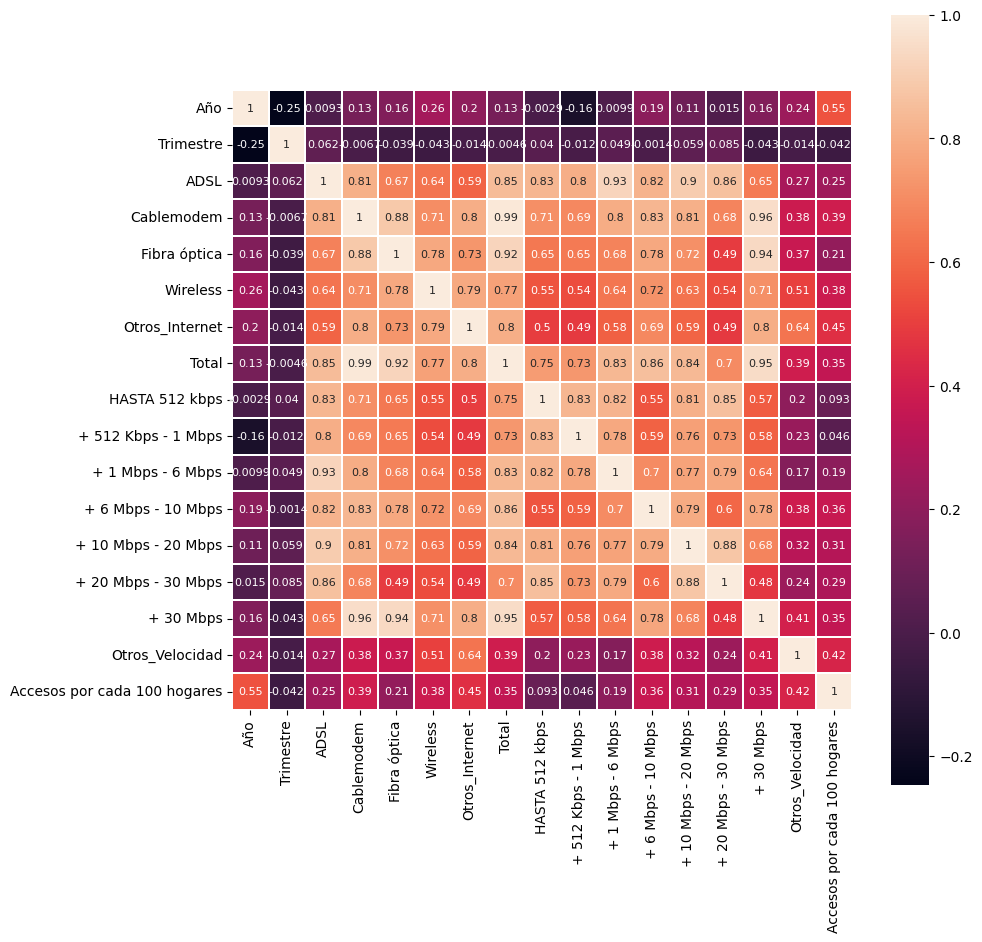

In [201]:
corr_matrix = final_df.corr()
sn.heatmap(corr_matrix, annot=True, square=True, annot_kws={'fontsize': 8}, linewidths=.3)
plt.gcf().set_size_inches(10, 10)
plt.show()

Observamos que la tendencia en Argentina es utilizar cablemodem para el servicio del Internet, 
de segundo lugar se encuentra la fibra optica el cual durante los ultimos años ha estado creciendo enormemente en comparacion a las demas tecnologias. 
Y de tercero encontramos el ADSL, una tecnologia que sorprendentemente sigue siendo vigente pero que ha estado disminuyendo su consumo al pasar de los años con la apariencia de mejores tecnologias. El ADSL se encuentra fuertemente limitado por la velocidad de descargar, con un tope de 24 Mbps.
A su vez la telefonia fija que tambien utilizar el mismo cableado de cobre que el ADSL, tambien ha estado en descenso.

Si se quiere tener exito en el mercado de telecomunicaciones en Argentina entonces se debe de pensar considerar el uso de cablemodem o fibra optica, y ofertar velocidades mayores a 30 Mbps

In [202]:
final_df.to_csv('./cache/datos.csv')

In [203]:
display(df_telefonia)

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos,Periodo
0,2013,1,7.761.349,57.147.608,64.908.957,Ene-Mar 2013
1,2013,2,7.769.110,58.004.822,65.773.932,Abr-Jun 2013
2,2013,3,8.002.183,59.048.909,67.051.092,Jul-Sept 2013
3,2013,4,8.674.516,58.894.516,67.569.032,Oct-Dic 2013
4,2014,1,8.224.482,54.725.089,62.949.571,Ene-Mar 2013
5,2014,2,7.953.775,53.009.865,60.963.640,Abr-Jun 2014
6,2014,3,8.214.424,53.102.043,61.316.467,Jul-Sept 2014
7,2014,4,8.027.505,53.093.330,61.120.835,Oct-Dic 2014
8,2015,1,7.747.230,52.474.633,60.221.863,Ene-Mar 2015
9,2015,2,7.633.527,52.241.939,59.875.466,Abr-Jun 2015


In [204]:
df_telefonia = df_telefonia.applymap(lambda x: x.replace('.','') if isinstance(x, str) else x)
df_ingresos_telefonia = df_ingresos_telefonia.applymap(lambda x: x.replace('.','') if isinstance(x, str) else x)
df_telefonia = df_telefonia.drop(columns='Periodo')
df_ingresos_telefonia = df_ingresos_telefonia.drop(columns='Periodo')
df_ingresos_telefonia = df_ingresos_telefonia.rename(columns={'Ingresos (miles de $)': 'Ingresos_Telefonia (miles de $)'})

In [205]:
df_ingresos_telefonia = df_ingresos_telefonia.applymap(lambda x: x.replace('$ ','') if isinstance(x, str) else x)

In [206]:
df_telefonia = df_telefonia.astype(np.int64)
df_ingresos_telefonia = df_ingresos_telefonia.astype(np.int64)

In [207]:
final_telefonia = pd.merge(df_telefonia, df_ingresos_telefonia, on=['Año', 'Trimestre'])
final_telefonia

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos,Ingresos_Telefonia (miles de $)
0,2013,1,7761349,57147608,64908957,13135235
1,2013,2,7769110,58004822,65773932,13970806
2,2013,3,8002183,59048909,67051092,15235659
3,2013,4,8674516,58894516,67569032,16218846
4,2014,1,8224482,54725089,62949571,15938353
5,2014,2,7953775,53009865,60963640,17680972
6,2014,3,8214424,53102043,61316467,18976053
7,2014,4,8027505,53093330,61120835,20012332
8,2015,1,7747230,52474633,60221863,19337342
9,2015,2,7633527,52241939,59875466,19945453


In [208]:
final_telefonia.to_csv('./cache/telefonia_movil_procesado.csv')

In [209]:
final_telefonia

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos,Ingresos_Telefonia (miles de $)
0,2013,1,7761349,57147608,64908957,13135235
1,2013,2,7769110,58004822,65773932,13970806
2,2013,3,8002183,59048909,67051092,15235659
3,2013,4,8674516,58894516,67569032,16218846
4,2014,1,8224482,54725089,62949571,15938353
5,2014,2,7953775,53009865,60963640,17680972
6,2014,3,8214424,53102043,61316467,18976053
7,2014,4,8027505,53093330,61120835,20012332
8,2015,1,7747230,52474633,60221863,19337342
9,2015,2,7633527,52241939,59875466,19945453



Vemos una enorme diferencia en los consumos de telefonia movil, con un 10.47% siendo postpago en comparacion de 89.53% siendo prepago.
Si se quiere adentrar dentro del mercado de telefonia movil se va tener que afincar con los servicios de prepago.

In [210]:
df_internet_ingresos = pd.read_csv('./data/Internet_Ingresos.csv')

In [211]:
df_internet_ingresos = df_internet_ingresos.applymap(lambda x: x.replace('.','') if isinstance(x, str) else x)
df_internet_ingresos = df_internet_ingresos.drop(columns='Periodo')

display(df_internet_ingresos)
df_internet_ingresos.info()

,Año,Trimestre,Ingresos (miles de pesos)
0,2022,3,67055930
1,2022,2,60335724
2,2022,1,55589997
3,2021,4,45467887
4,2021,3,42999944
5,2021,2,38239667
6,2021,1,36676371
7,2020,4,33539703
8,2020,3,31997445
9,2020,2,32102476


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
dtypes: int64(2), object(1)
memory usage: 968.0+ bytes


In [212]:
df_internet_ingresos = df_internet_ingresos.astype(np.int64)
df_internet_ingresos = df_internet_ingresos.rename(columns={'Ingresos (miles de pesos)': 'Ingresos_Internet (miles de pesos)'})

In [213]:
df_television_ingresos = pd.read_csv('./data/Television.csv')
display(df_television_ingresos)

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,3,"$ 52.242.784,63","$ 27.073.190,89"
1,2022,2,"$ 46.292.673,44","$ 23.559.484,83"
2,2022,1,"$ 42.093.870,19","$ 21.268.086,24"
3,2021,4,"$ 38.273.391,8","$ 18.038.065,44"
4,2021,3,"$ 36.398.025,53","$ 18.039.519,5"
5,2021,2,"$ 33.674.995,79","$ 18.038.442,36"
6,2021,1,"$ 31.924.515,01","$ 18.038.360,96"
7,2020,4,"$ 26.324.098,62","$ 14.479.622,62"
8,2020,3,"$ 25.386.154,6","$ 12.933.200,33"
9,2020,2,"$ 24.620.009,49","$ 12.544.725,93"


In [214]:
df_television_ingresos = df_television_ingresos.applymap(lambda x: x.replace('.','') if isinstance(x, str) else x)
df_television_ingresos = df_television_ingresos.applymap(lambda x: x.replace('$ ','') if isinstance(x, str) else x)
df_television_ingresos = df_television_ingresos.applymap(lambda x: x.replace(',','.') if isinstance(x, str) else x)


df_television_ingresos['Ingresos TV por suscripción  (miles de $)'] = df_television_ingresos['Ingresos TV por suscripción  (miles de $)'].astype(np.float64)
df_television_ingresos['Ingresos TV satelital (miles de $)'] = df_television_ingresos['Ingresos TV satelital (miles de $)'].astype(np.float64)

In [215]:
display(df_television_ingresos)

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,3,52242784.63,27073190.89
1,2022,2,46292673.44,23559484.83
2,2022,1,42093870.19,21268086.24
3,2021,4,38273391.80,18038065.44
4,2021,3,36398025.53,18039519.50
5,2021,2,33674995.79,18038442.36
6,2021,1,31924515.01,18038360.96
7,2020,4,26324098.62,14479622.62
8,2020,3,25386154.60,12933200.33
9,2020,2,24620009.49,12544725.93


In [218]:
df_ingresos = pd.merge(pd.merge(df_internet_ingresos, df_ingresos_telefonia, on=['Año', 'Trimestre']), df_television_ingresos, on=['Año', 'Trimestre'])
df_ingresos.to_csv('./cache/ingresos.csv')

In [219]:
display(df_ingresos)

,Año,Trimestre,Ingresos_Internet (miles de pesos),Ingresos_Telefonia (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,3,67055930,174057836,52242784.63,27073190.89
1,2022,2,60335724,153032313,46292673.44,23559484.83
2,2022,1,55589997,130454676,42093870.19,21268086.24
3,2021,4,45467887,127389786,38273391.80,18038065.44
4,2021,3,42999944,117751925,36398025.53,18039519.50
5,2021,2,38239667,104782020,33674995.79,18038442.36
6,2021,1,36676371,93112153,31924515.01,18038360.96
7,2020,4,33539703,83479114,26324098.62,14479622.62
8,2020,3,31997445,79634755,25386154.60,12933200.33
9,2020,2,32102476,73538944,24620009.49,12544725.93


Si nos vamos por ganancias, los campos que mas ingresos otorga es la telefonia movil, seguida de television y luego el internet

Los ingresos de la telefonia movil ha estado en aumento junto con el consumo del internet

Es comun ver paquetes que ofrecen internet cablemodem y TV

In [224]:
df_acceso_television = pd.read_csv('./data/acceso_television.csv')
df_acceso_television = df_acceso_television.applymap(lambda x: x.replace('.','') if isinstance(x, str) else x)
df_acceso_television = df_acceso_television.drop(columns='Periodo')
df_acceso_television = df_acceso_television.astype(np.int64)

df_acceso_television.to_csv('./cache/acceso_television.csv')
display(df_acceso_television)

,Año,Trimestre,Accesos TV por suscripción,Accesos TV satelital
0,2022,3,7665931,2064699
1,2022,2,7647584,2064637
2,2022,1,7564827,2049628
3,2021,4,7596758,2010217
4,2021,3,7676892,2147571
5,2021,2,7333071,2326029
6,2021,1,7346948,2261855
7,2020,4,7332508,2320365
8,2020,3,7329433,2451671
9,2020,2,7224135,2453731


In [226]:
df_telefonia.to_csv('./cache/acceso_telefonia.csv')
display(df_telefonia)

,Año,Trimestre,Total de accesos pospago,Total de accesos prepago,Total de accesos operativos
0,2013,1,7761349,57147608,64908957
1,2013,2,7769110,58004822,65773932
2,2013,3,8002183,59048909,67051092
3,2013,4,8674516,58894516,67569032
4,2014,1,8224482,54725089,62949571
5,2014,2,7953775,53009865,60963640
6,2014,3,8214424,53102043,61316467
7,2014,4,8027505,53093330,61120835
8,2015,1,7747230,52474633,60221863
9,2015,2,7633527,52241939,59875466
